<h2 style='color:blue' align="center">Logistic Regression: Multiclass Classification</h2>

In this tutorial we will see how to use logistic regression for multiclass classification. 

In [1]:
# sklearn.datasets contain the pre-defined ready-made datasets
from sklearn.datasets import load_digits
%matplotlib inline
import matplotlib.pyplot as plt
digits = load_digits()

In [3]:
# Let us see what this training data set contains
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [6]:
# each image is of 8 X 8
# an image is represnted as 1D array
# if you count there will be 64 entries (8X8)
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

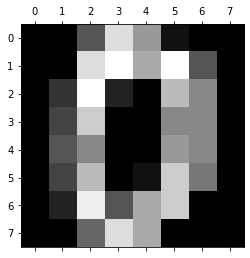

In [9]:
# You can see the corresponding image of data[0]
# where ever we have 0 in out data you can see it as black color else slight grey / white color
plt.gray()
plt.matshow(digits.images[0])

<Figure size 432x288 with 0 Axes>

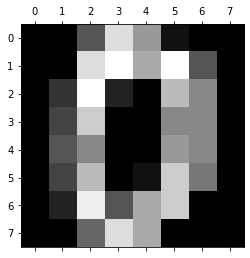

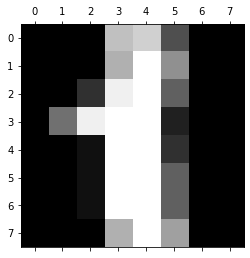

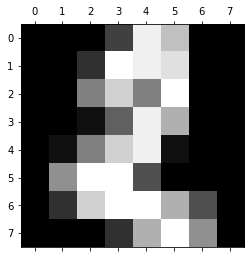

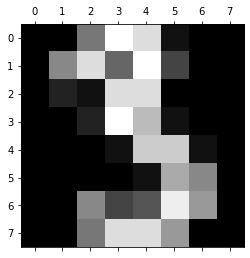

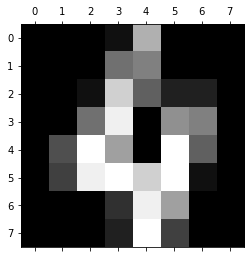

In [10]:
plt.gray() 
for i in range(5):
    plt.matshow(digits.images[i]) 

In [12]:
# you can see above 5 images are 0,1,2,3,4
digits.target[0:5]

array([0, 1, 2, 3, 4])

<h4 style='color:purple'>Create and train logistic regression model</h4>

In [13]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target, test_size=0.2)

In [20]:
# X_train will have hand-written characters represnted in the form of arrays
# y_train will have corresponding output
model.fit(X_train, y_train) # Train the model

C:\Users\egjmnnq\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
X_train

array([[ 0.,  0.,  2., ..., 12.,  3.,  0.],
       [ 0.,  0.,  3., ..., 15.,  5.,  0.],
       [ 0.,  0.,  2., ..., 11.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  2.,  0.,  0.],
       [ 0.,  0.,  8., ..., 15.,  5.,  0.]])

In [22]:
y_train

array([6, 6, 1, ..., 7, 4, 3])

<h4 style='color:purple'>Measure accuracy of our model</h4>

In [23]:
# check the accuracy of the model
# it will return the predcited values
# those predicted values will be compared against the actual values(y_test)
model.score(X_test, y_test)

0.9722222222222222

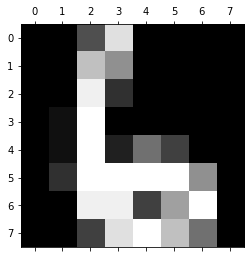

In [25]:
plt.matshow(digits.images[67])

In [26]:
digits.target[67]

6

In [32]:
# it is predicting correctly as 6
model.predict(digits.data[[67]])

array([6])

In [34]:
# It is predicting correctly as 0,1,2,3,4
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

<h4 style='color:purple'>Confusion Matrix</h4>

In [36]:
y_predicted = model.predict(X_test)

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[45,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 45,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 39,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 25,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 33,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0, 26,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 38,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  0],
       [ 0,  1,  1,  0,  0,  0,  1,  0, 33,  0],
       [ 0,  0,  0,  0,  1,  1,  0,  0,  2, 30]], dtype=int64)

Text(69.0, 0.5, 'Truth')

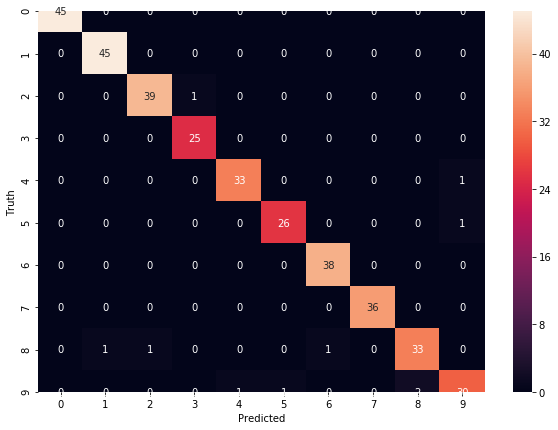

In [38]:
# confusion matrix visulalization
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Exercise**

Use sklearn.datasets iris flower dataset to train your model using logistic regression. You need to figure out accuracy 
of your model and use that to predict different samples in your test dataset. In iris dataset there are 150 samples containing following features,

1. Sepal Length
2. Sepal Width 
3. Petal Length 
4. Petal Width

Using above 4 features you will clasify a flower in one of the three categories,

1. Setosa
2. Versicolour
3. Virginica

<img height=300 width=300 src="iris_petal_sepal.png" />